<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/stock_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install finance-datareader

In [ ]:
!apt -qq install fonts-nanum*

fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
# matplotlib rebuild
import matplotlib as mpl
#mpl.font_manager._rebuild()

In [ ]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [ ]:
# kospi_df = fdr.DataReader('KS11') # 코스피
# kosdaq_df = fdr.DataReader('KQ11') # 코스닥
# dj_df = fdr.DataReader('DJI') # 다우존스
# nas_df = fdr.DataReader('IXIC') # 나스닥
# sp_df = fdr.DataReader('US500') # S&P500

In [ ]:
# san_df = fdr.DataReader('SSE') # 상해
# sim_df = fdr.DataReader('SZSE') # 심천
# hon_df = fdr.DataReader('HKEX') # 홍콩
# to_df = fdr.DataReader('TSE') # 도쿄

In [ ]:
# btc = fdr.DataReader('BTC/KRW', '2016-01-01')

In [ ]:
# FX 환율, 1995 ~ 현재
# usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') # 달러 원화
# usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
# usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화

In [ ]:
# 채권 수익률
# df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
# df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률

# df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
# df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

In [ ]:
# KRX stock symbol list
# stocks = fdr.StockListing('KRX') # 코스피, 코스닥, 코넥스 전체

# S&P 500 symbol list
# sp500 = fdr.StockListing('S&P500')

In [ ]:
# 기타 주요 거래소 상장종목 리스트
san_stocks = fdr.StockListing('SSE') # 상해 거래소
sim_stocks = fdr.StockListing('SZSE') # 신천 거래소
hon_stocks = fdr.StockListing('HKEX') # 홍콩거래소
to_stocks = fdr.StockListing('TSE') # 도쿄 증권거래소
hos_stocks = fdr.StockListing('HOSE') # 호치민 증권거래소


100%|██████████| 1034/1034 [00:09<00:00, 114.88it/s]

100%|██████████| 1423/1423 [00:12<00:00, 117.36it/s]

100%|██████████| 2644/2644 [00:22<00:00, 117.27it/s]

100%|██████████| 3928/3928 [00:32<00:00, 120.00it/s]

100%|██████████| 410/410 [00:03<00:00, 112.58it/s]


In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['10년만기 한국국채', 'KR10YT=RR'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,10년만기 한국국채
Date,,
2017-01-02,2026.16,2.054
2017-01-03,2043.97,2.061
2017-01-04,2045.64,2.097
2017-01-05,2041.95,2.064
2017-01-06,2049.12,2.084


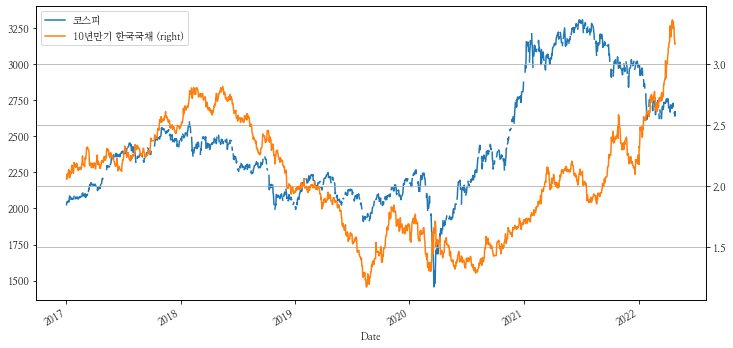

In [ ]:
df[['코스피', '10년만기 한국국채']].plot(secondary_y=['10년만기 한국국채'])

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['1년만기 한국국채', 'KR1YT=RR'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,1년만기 한국국채
Date,,
2017-01-02,2026.16,1.551
2017-01-03,2043.97,1.512
2017-01-04,2045.64,1.496
2017-01-05,2041.95,1.478
2017-01-06,2049.12,1.490


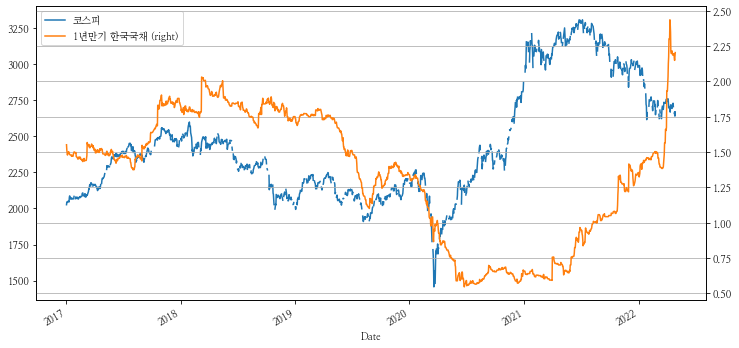

In [ ]:
df[['코스피', '1년만기 한국국채']].plot(secondary_y=['1년만기 한국국채'])

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['도쿄 증권거래소', 'TSE'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,도쿄 증권거래소
Date,,
2017-01-02,2026.16,NaN
2017-01-03,2043.97,60.9
2017-01-04,2045.64,61.1
2017-01-05,2041.95,60.9
2017-01-06,2049.12,60.8


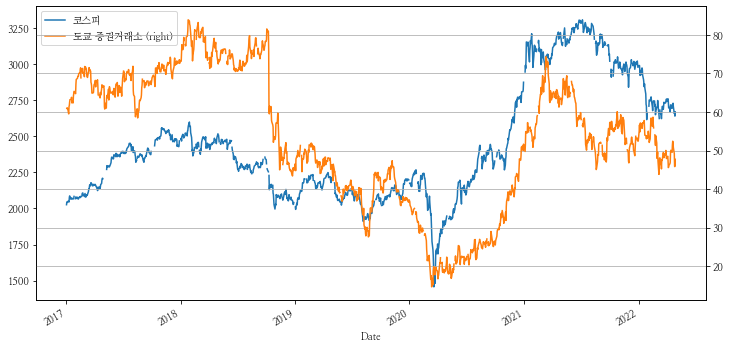

In [ ]:
df[['코스피', '도쿄 증권거래소']].plot(secondary_y=['도쿄 증권거래소']) # HKEX

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['1개월 만기 미국국채 수익률', 'US1MT=X'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,1개월 만기 미국국채 수익률
Date,,
2017-01-02,2026.16,0.4335
2017-01-03,2043.97,0.4670
2017-01-04,2045.64,0.4920
2017-01-05,2041.95,0.4970
2017-01-06,2049.12,0.5000


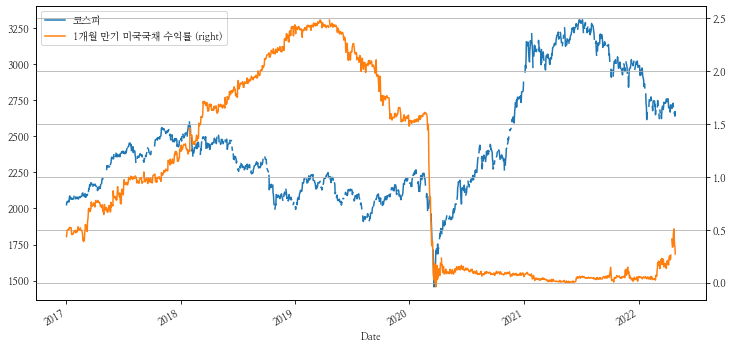

In [ ]:
df[['코스피', '1개월 만기 미국국채 수익률']].plot(secondary_y=['1개월 만기 미국국채 수익률']) # HKEX

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['10년 만기 미국국채 수익률', 'US10YT=X'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,10년 만기 미국국채 수익률
Date,,
2017-01-02,2026.16,2.446
2017-01-03,2043.97,2.448
2017-01-04,2045.64,2.441
2017-01-05,2041.95,2.348
2017-01-06,2049.12,2.421


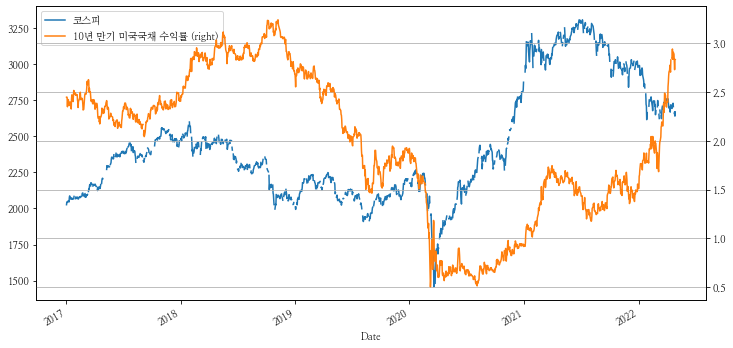

In [ ]:
df[['코스피', '10년 만기 미국국채 수익률']].plot(secondary_y=['10년 만기 미국국채 수익률']) 

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['달러 유로화', 'USD/EUR'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,달러 유로화
Date,,
2017-01-02,2026.16,0.9560
2017-01-03,2043.97,0.9610
2017-01-04,2045.64,0.9534
2017-01-05,2041.95,0.9427
2017-01-06,2049.12,0.9494


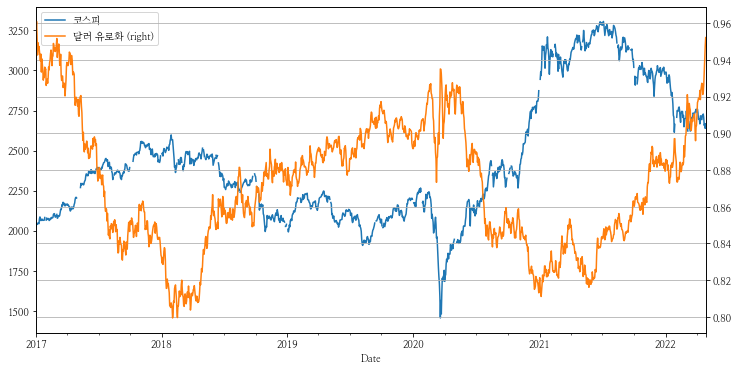

In [ ]:
df[['코스피', '달러 유로화']].plot(secondary_y=['달러 유로화']) 

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['달러 위엔화', 'USD/CNY'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

 89%|████████▊ | 2340/2644 [14:04<01:49,  2.77it/s] 


,코스피,달러 위엔화
Date,,
2017-01-02,2026.16,6.9450
2017-01-03,2043.97,6.9610
2017-01-04,2045.64,6.9351
2017-01-05,2041.95,6.8900
2017-01-06,2049.12,6.9207


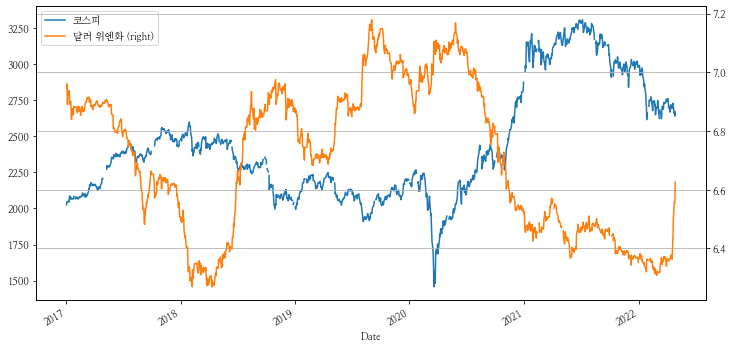

In [ ]:
df[['코스피', '달러 위엔화']].plot(secondary_y=['달러 위엔화'])  # SSE

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['상해', 'SSE'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,상해
Date,,
2017-01-02,2026.16,NaN
2017-01-03,2043.97,1555.0
2017-01-04,2045.64,1536.0
2017-01-05,2041.95,1545.0
2017-01-06,2049.12,1540.0


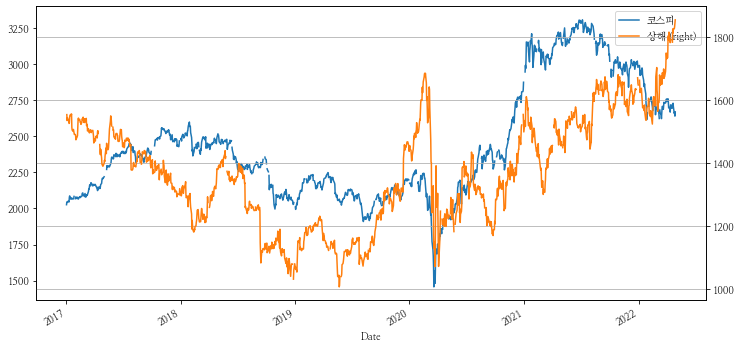

In [ ]:
df[['코스피', '상해']].plot(secondary_y=['상해'])   